# ИУ5-63Б Лебедева София, Вариант 10

Для заданного набора данных построить модели регрессии. Для построения моделей используйте методы: **дерево решений и случайный лес**.

Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему?

Какие выводы Вы можете сделать о качестве построенных моделей?

Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д. Для сокращения времени построения моделей можно использовать фрагмент набора данных (например, первые 200-500 строк).

Набор данных **brazilian_houses_to_rent (файл houses_to_rent_v2.csv)**

city - находится ли недвижимость в городе

area - площадь недвижимости в квадратных метрах

rooms - количество комнат

bathroom - количество ванных комнат

parking spaces - количество парковочных мест

floor - этаж, на котором находится недвижимость

animal - принимает ли недвижимость животных ('acept' - допускается, 'not acept' - не допускается)

furniture - состояние мебели в недвижимости ('furnished' - меблировано, 'not furnished' - не меблировано)

hoa - стоимость услуг по обслуживанию жилого комплекса

rent amount - арендная плата

property tax - налог на недвижимость

fire insurance - стоимость страхования от пожара

total - общая стоимость аренды, включающая все расходы

## Подготовка данных

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('houses_to_rent_v2.csv')
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
data.shape

(10692, 13)

In [4]:
data.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [5]:
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

### Видно, что в колонке 'floor' хранятся числовые значения, которые из-за обозначения пропуска значком '-' воспринимаются как object

In [6]:
data['floor'] = data['floor'].replace('-', np.nan).astype(float)
data['floor']

0         7.0
1        20.0
2         6.0
3         2.0
4         1.0
         ... 
10687     5.0
10688    17.0
10689     8.0
10690     8.0
10691     NaN
Name: floor, Length: 10692, dtype: float64

In [7]:
data.isnull().sum()

city                      0
area                      0
rooms                     0
bathroom                  0
parking spaces            0
floor                  2461
animal                    0
furniture                 0
hoa (R$)                  0
rent amount (R$)          0
property tax (R$)         0
fire insurance (R$)       0
total (R$)                0
dtype: int64

In [8]:
print(f"{data['floor'].isnull().sum()/ len(data['floor']) * 100}%")

23.01720912832024%


In [10]:
data['floor'].describe()

count    8231.000000
mean        6.583283
std         6.153925
min         1.000000
25%         2.000000
50%         5.000000
75%         9.000000
max       301.000000
Name: floor, dtype: float64

### Так как есть выбросы в столбце 'floor', то буду применять стратегию -- median

<Axes: xlabel='floor'>

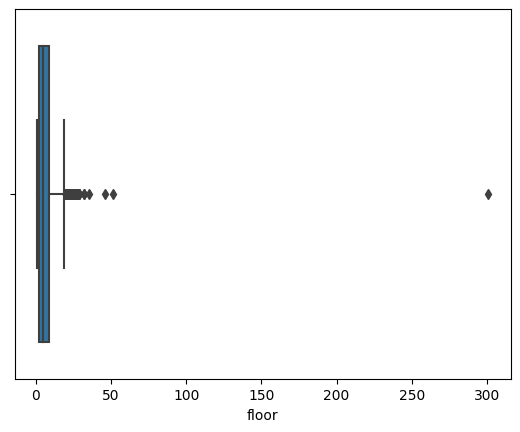

In [11]:
import seaborn as sns

sns.boxplot(x=data['floor'])

In [12]:
from sklearn.impute import MissingIndicator, SimpleImputer

In [13]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)

    filled_data = data_num_imp[mask_missing_values_only]

    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]


In [14]:
# Вызываем функцию для замены пропусков в magnesium
result_floor = test_num_impute_col(data, 'floor', 'median')
print("Результат для magnesium:", result_floor)


Результат для magnesium: ('floor', 'median', 2461, 5.0, 5.0)


In [15]:
data['floor'].fillna(result_floor[3], inplace=True)

In [16]:
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [17]:
data.dtypes

city                    object
area                     int64
rooms                    int64
bathroom                 int64
parking spaces           int64
floor                  float64
animal                  object
furniture               object
hoa (R$)                 int64
rent amount (R$)         int64
property tax (R$)        int64
fire insurance (R$)      int64
total (R$)               int64
dtype: object

### С помощью LabelEncoder закодирую категориальные данные

In [18]:
categorical_cols=data.select_dtypes(include=object).columns.to_list()
categorical_cols

['city', 'animal', 'furniture']

In [19]:
for cat in categorical_cols:
    print(f"column -- {cat}: {data[cat].unique()}")

column -- city: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
column -- animal: ['acept' 'not acept']
column -- furniture: ['furnished' 'not furnished']


In [20]:
from sklearn.preprocessing import LabelEncoder

for cat in categorical_cols:
    le = LabelEncoder()
    data[cat] = le.fit_transform(data[cat])

In [21]:
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,4,70,2,1,1,7.0,0,0,2065,3300,211,42,5618
1,4,320,4,4,0,20.0,0,1,1200,4960,1750,63,7973
2,2,80,1,1,1,6.0,0,1,1000,2800,0,41,3841
3,2,51,2,1,0,2.0,0,1,270,1112,22,17,1421
4,4,25,1,1,0,1.0,1,1,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,2,63,2,1,1,5.0,1,0,402,1478,24,22,1926
10688,4,285,4,4,4,17.0,0,1,3100,15000,973,191,19260
10689,3,70,3,3,0,8.0,1,0,980,6000,332,78,7390
10690,3,120,2,2,2,8.0,0,0,1585,12000,279,155,14020


In [22]:
data.dtypes

city                     int64
area                     int64
rooms                    int64
bathroom                 int64
parking spaces           int64
floor                  float64
animal                   int64
furniture                int64
hoa (R$)                 int64
rent amount (R$)         int64
property tax (R$)        int64
fire insurance (R$)      int64
total (R$)               int64
dtype: object

In [23]:
X = data.drop('total (R$)', axis=1)
y = data['total (R$)']

In [24]:
X

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,4,70,2,1,1,7.0,0,0,2065,3300,211,42
1,4,320,4,4,0,20.0,0,1,1200,4960,1750,63
2,2,80,1,1,1,6.0,0,1,1000,2800,0,41
3,2,51,2,1,0,2.0,0,1,270,1112,22,17
4,4,25,1,1,0,1.0,1,1,0,800,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,2,63,2,1,1,5.0,1,0,402,1478,24,22
10688,4,285,4,4,4,17.0,0,1,3100,15000,973,191
10689,3,70,3,3,0,8.0,1,0,980,6000,332,78
10690,3,120,2,2,2,8.0,0,0,1585,12000,279,155


In [25]:
y

0         5618
1         7973
2         3841
3         1421
4          836
         ...  
10687     1926
10688    19260
10689     7390
10690    14020
10691     1587
Name: total (R$), Length: 10692, dtype: int64

In [26]:
# Формирование обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Обучение

In [27]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
dtr_y_test = dtr.predict(X_test)

In [28]:
dtr.get_depth()

26

In [29]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
rfr_y_test = rfr.predict(X_test)

In [30]:
from sklearn.model_selection import GridSearchCV

### Подбор параметров с помощью GridSearchCV

In [31]:
param_rf = {
    'n_estimators': [25, 50, 75, 100, 150, 200, 250, 300],
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_rf,
                              cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print(f"Лучший параметр: {grid_search_rf.best_params_}")

Лучший параметр: {'n_estimators': 200}


In [32]:
# Определение сетки гиперпараметров для глубины дерева решений
param_grid = {
    'max_depth': list(range(3, 31))  # от 3 до 30 с шагом 1
}

# Инициализация и настройка GridSearchCV для DecisionTreeRegressor
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Лучший параметр: {grid_search.best_params_}")

Лучший параметр: {'max_depth': 23}


In [33]:
rfr = RandomForestRegressor(n_estimators=200, random_state=42)
rfr.fit(X_train, y_train)
rfr_y_test = rfr.predict(X_test)

In [34]:
dtr = DecisionTreeRegressor(max_depth=23, random_state=42)
dtr.fit(X_train, y_train)
dtr_y_test = dtr.predict(X_test)

## Оценка

Для оценки моделей были выбраны метрики для задачи регрессии (которую мы здесь и решаем): MAE и  𝑅2

MAE - легко интерпретируетмая метрика, которая позволяет понять среднее отклонение в тех же единицах измерения, что и данные (бразильские реалаы).

𝑅2 - метрика, по которой можно понять насколько хорошо модель обрабатывает разные данные.

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error

In [36]:
# R2
print(f"Дерево решений: {r2_score(y_test, dtr_y_test):.4f}")
print(f"Случайный лес: {r2_score(y_test, rfr_y_test):.4f}")

Дерево решений: 0.8971
Случайный лес: 0.9951


In [37]:
# MAE
print(f"Дерево решений: {mean_absolute_error(y_test, dtr_y_test):.4f}")
print(f"Случайный лес: {mean_absolute_error(y_test, rfr_y_test):.4f}")

Дерево решений: 177.8093
Случайный лес: 80.0499


## Выводы

Случайный лес имеет заметно меньшее значение MAE, то есть его предсказания в среднем ближе к реальным.

Ожидаемо, более сложная модель, случайный лес, показала лучшие результаты на обеих метриках.